In [1]:
from typing import Union
import graphviz
import os
import random
import json

In [2]:
COLORS = ['aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'blanchedalmond',  'blue', 'blueviolet', 'brown',
          'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',  'cornsilk', 'crimson',
          'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgreen',  'darkkhaki', 'darkmagenta', 'darkolivegreen',
          'darkorange', 'darkorchid', 'darkred', 'darksalmon',  'darkseagreen', 'darkslateblue', 'darkslategray',
          'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink',  'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue',
          'firebrick', 'forestgreen', 'fuchsia',  'gainsboro', 'gold', 'goldenrod', 'green', 'greenyellow', 'honeydew',
          'hotpink',  'indianred', 'indigo', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon',  'lightblue',
          'linen', 'magenta', 'maroon', 'mediumaquamarine',  'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen',
          'mediumslateblue', 'mediumspringgreen',  'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mistyrose',
          'moccasin',  'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 
          'palegreen',  'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue',
          'purple',  'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell',
          'sienna',  'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'springgreen', 'steelblue', 'tan', 'teal',
          'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'yellow', 'yellowgreen']
random.shuffle(COLORS)

In [3]:
class Node:

    def __init__(self, number, connections=None):
        """
        number – id вершины
        connections - список с ссылками на другие вершин
        color – название цвета
        """
        if connections is None:
            connections = []
        self.number: int = number
        self.connections: list = connections
        self.color: str = 'white'

    def connect(self, node):
        """
        Связывает две вершины (и ту, и другую)
        """
        if not isinstance(node, Node):
            raise ValueError("Подан не тот тип")

        self.connections.append(node)
        node.connections.append(self)
        
    def paint(self, color: Union[int, str]):
        """
        Окрашивает вершину в указанный цвет по его id или названию
        """
        if isinstance(color, int) and 0 <= color <= len(COLORS) - 1:
            self.color = COLORS[color]
            
        elif isinstance(color, str):
            self.color = color
            
        else:
            raise ValueError("Неверный формат цвета")

In [4]:
class Graph:

    def __init__(self, nodes_lst=None):
        """
        nodes – список вершин
        graph_image – изображение графа
        """
        if nodes_lst is None:
            nodes_lst = []
        self.nodes: list = nodes_lst

        self.n = len(self.nodes)
        self.graph_image = graphviz.Graph(
            filename="Graph", format='png', 
            strict=True,
            graph_attr={'size': '5!'}
        )
        

    def add_node(self, node):
        """
        Добавляет вершину в граф
        """
        if not isinstance(node, Node):
            raise Exception("Подан не тот тип")

        self.nodes.append(node)
        
    def _form_image(self):        
        for node in self.nodes:
            self.graph_image.node(str(node.number), str(node.number),
                                  style='filled', colorscheme="SVG",
                                  fillcolor=node.color)

        for source in self.nodes:
            for dest in source.connections:
                self.graph_image.edge(str(source.number), str(dest.number))

    def show(self):
        """
        Визуализирует граф
        """
        self._form_image()
        return self.graph_image
    
    def paint(self, colors):
        for node, color in zip(self.nodes, colors):
            node.paint(color)
    
    def check_coloring(self):
        """
        Проверяет, правильно ли раскрашен граф
        """
        for node in self.nodes:
            for adjacent_node in node.connections:
                if node.color == adjacent_node.color:
                    return False
        return True

In [5]:
def input_int(name='', low=float('-inf'), top=float('inf')):
    """
    Ввод числа через консоль с верхней и нижней границей
    """
    while True:
        number = input(name)
        try:
            int(number)
            if int(number) < low:
                print(f'Число должно быть больше либо равно {low}')
            elif int(number) > top:
                print(f'Число должно быть меньше либо равно {top}')
            else:
                number = int(number)
                break
        except ValueError:
            print('Неверный тип данных')
    return number

In [6]:
def input_several(sep=','):
    """
    Ввод нескольких чисел через разделитель
    """
    while True:
        data = input().replace(' ', '')
        if data == '':
            return []

        try:
            return list(map(int, data.split(",")))
        except ValueError:
            print(f"Введите данные корректно (используя '{sep}')!")

In [7]:
def get_default_graph():
    n = [Node(i + 1) for i in range(20)]
    
    n[0].connect(n[1])
    n[0].connect(n[2])
    n[0].connect(n[5])
    n[0].connect(n[9])
    n[0].connect(n[19])
    n[1].connect(n[16])
    n[2].connect(n[11])
    n[3].connect(n[13])
    n[3].connect(n[14])
    n[4].connect(n[15])
    n[4].connect(n[7])
    n[5].connect(n[10])
    n[5].connect(n[8])
    n[6].connect(n[16])
    n[6].connect(n[13])
    n[7].connect(n[10])
    n[8].connect(n[11])
    n[9].connect(n[12])
    n[9].connect(n[17])
    n[11].connect(n[14])
    n[12].connect(n[18])
    n[12].connect(n[19])
    n[15].connect(n[19])
    n[16].connect(n[17])
    
    return Graph(n)

In [8]:
def get_default_graph_3():
  n = [Node(i + 1) for i in range(10)]
    
  n[0].connect(n[1])
  n[0].connect(n[2])
  n[0].connect(n[3])
  n[1].connect(n[4])
  n[1].connect(n[8])
  n[2].connect(n[6])
  n[2].connect(n[7])
  n[3].connect(n[5])
  n[3].connect(n[9])
  n[4].connect(n[5])
  n[4].connect(n[7])
  n[5].connect(n[6])
  n[6].connect(n[8])
  n[7].connect(n[8])
  n[8].connect(n[9])

  return Graph(n)

In [9]:
def graph_create(n: int):
    """
    Ручной ввод графа
    """
    graph = Graph()
    nodes = [Node(i + 1) for i in range(n)]
    
    # Объявление вершин
    node_number = 0
    for i in range(n):
        cur_node = nodes[i]
        # Связывание вершин
        while i != node_amount - 1:
            print("Перечислите через запятую вершины, с которыми связана вершина", node_number + 1)
            node_connections = input_several()

            if any([conn > node_amount or conn == node_number + 1 for conn in node_connections]) \
                    and node_connections != []:
                print("Введите корректные вершины!")
                continue

            for conn in node_connections:
                cur_node.connect(nodes[conn - 1])
            break
        graph.add_node(cur_node)
        node_number += 1

    return graph

Создадим граф

In [10]:
default_choice = input_int('Использовать ли граф по умолчанию (0) или ввести вручную (1):\n', low=0, top=1)

Использовать ли граф по умолчанию (0) или ввести вручную (1):
0


In [11]:
if default_choice:
    node_amount = input_int("Введите количество вершин графа\n", low=1)
    graph = graph_create(node_amount)
else:
    graph = get_default_graph_3()

Наш граф пока выглядит так

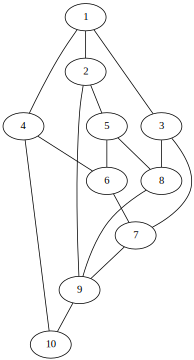

In [12]:
graph.show()

Окрасим каждую вершину графа в свой цвет

In [13]:
for color, node in enumerate(graph.nodes):
    node.paint(color)

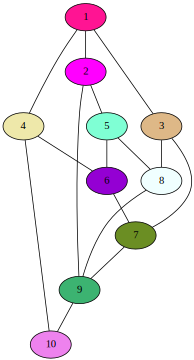

In [14]:
graph.show()

Цвета можно легко менять, если надо

In [15]:
graph.nodes[3].color = 'yellow'

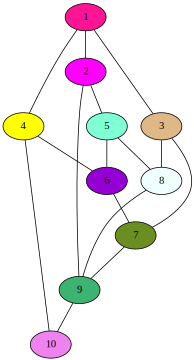

In [16]:
graph.show()

Метод check_coloring() проверяет, правильно ли раскрашен граф

In [17]:
graph.check_coloring()

True

In [18]:
graph.nodes[0].color = 'yellow'

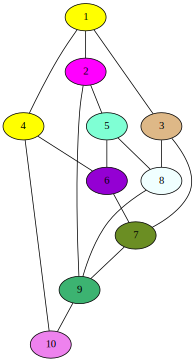

In [19]:
graph.show()

In [20]:
graph.check_coloring()

False

Раскраска особи

In [21]:
colors = [random.randint(0, graph.n - 1) for _ in range(graph.n)]
colors

[5, 3, 2, 5, 9, 2, 6, 9, 7, 6]

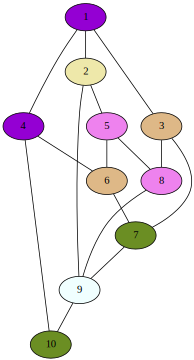

In [22]:
graph.paint(colors)
graph.show()

In [23]:
print(graph.check_coloring())
print('Количество цветов:', len(set(colors)))

False
Количество цветов: 6


In [26]:
from deap import base, algorithms
from deap import creator
from deap import tools

In [27]:
import numpy as np

In [28]:
LENGTH_CHROM = graph.n    # длина хромосомы, подлежащей оптимизации

In [29]:
# константы генетического алгоритма
POPULATION_SIZE = 500   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 30    # максимальное количество поколений
HALL_OF_FAME_SIZE = 1

In [30]:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [31]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [32]:
toolbox = base.Toolbox()
# ген представляет собой значение индекса цвета из списка COLORS
toolbox.register("randomOrder", random.randint, 0, len(COLORS))
# индивидуум-хромосома представляет собой последовательность генов (значений цветов) длинной в количесвто вершин
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomOrder, LENGTH_CHROM)
# определение популяции (количесвто индивидуумов задается чуть ниже)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [33]:
# создание популяции с n индивидуумами
population = toolbox.populationCreator(n=POPULATION_SIZE)

In [34]:
def dikstryFitness(individual):
  graph.paint(individual)
  if graph.check_coloring():
    return len(set(individual)),
  else:
    return 100,

In [35]:
toolbox.register("evaluate", dikstryFitness)
# селекция с помощью турнирного отбора
toolbox.register("select", tools.selTournament, tournsize=3)
# скрещивание одноточечное
toolbox.register("mate", tools.cxOrdered)
# мутация перетасовкой
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/LENGTH_CHROM/10)

In [36]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

In [37]:
population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)

[81, 14, 3, 94, 35, 31, 28, 17, 94, 13]
[86, 94, 114, 69, 11, 75, 54, 4, 3, 11]
[27, 29, 64, 77, 3, 71, 25, 91, 83, 89]
[69, 53, 28, 57, 75, 35, 103, 111, 0, 97]
[103, 20, 89, 54, 43, 35, 19, 27, 97, 43]
[13, 11, 48, 12, 45, 108, 44, 77, 33, 103]
[5, 93, 58, 68, 15, 48, 10, 70, 37, 106]
[80, 79, 113, 110, 46, 73, 24, 90, 8, 5]
[84, 29, 98, 37, 10, 109, 29, 110, 12, 48]
[35, 58, 81, 106, 46, 20, 47, 45, 26, 85]
[34, 89, 87, 82, 9, 77, 81, 21, 68, 93]
[31, 20, 59, 48, 34, 81, 88, 71, 28, 87]
[41, 107, 98, 99, 7, 29, 105, 4, 103, 40]
[51, 34, 8, 27, 116, 72, 112, 91, 40, 27]


ValueError: Неверный формат цвета